In [1]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures

In [2]:
download_robot_execution_failures()

In [3]:
timeseries, y = load_robot_execution_failures()

In [4]:
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [ ]:
y

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

In [7]:
import matplotlib.pyplot as plt

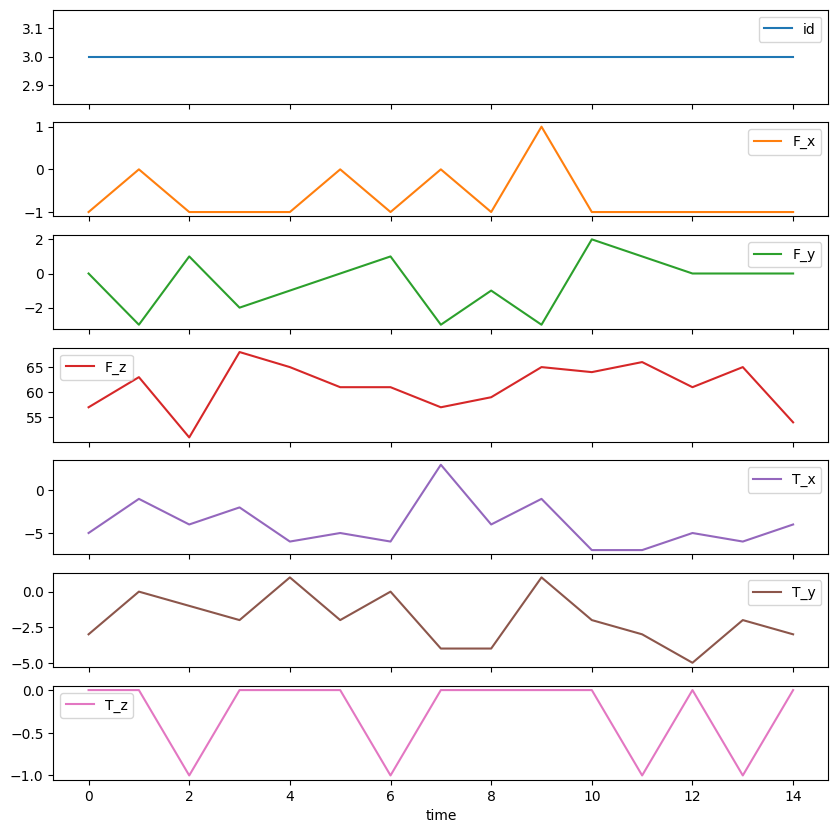

In [10]:
timeseries[timeseries['id'] == 3].set_index('time').plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

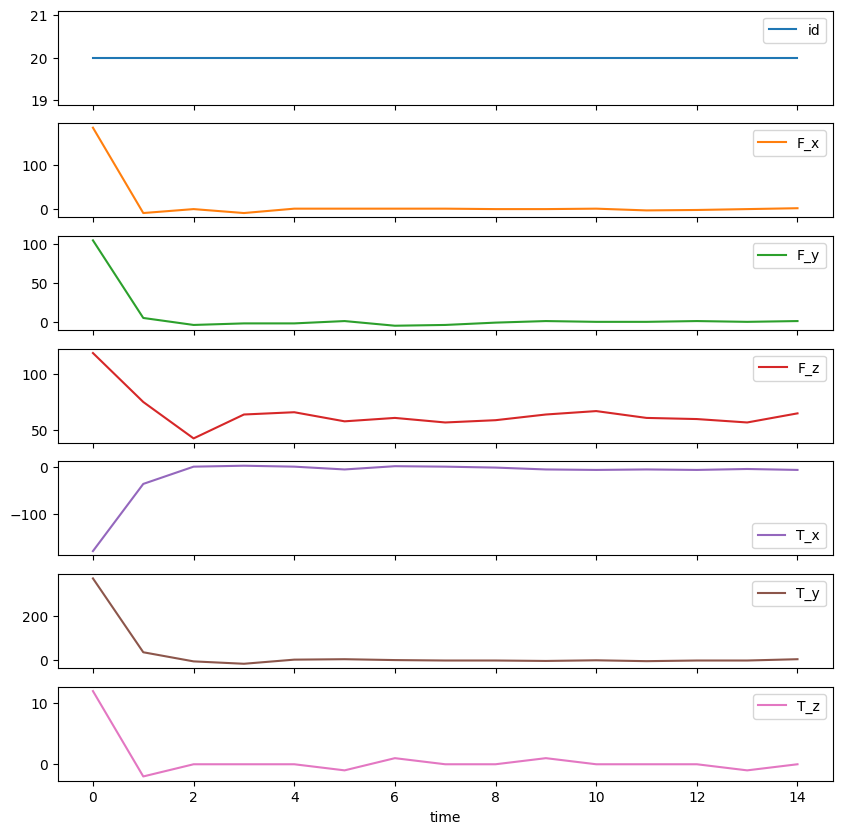

In [11]:
timeseries[timeseries['id'] == 20].set_index('time').plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [23]:
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [29]:
y.shape

(88,)

In [30]:
timeseries.shape

(1320, 8)

can clearly see some differences in time series for machines reporting failures (id = 3), and those not reporting failures (id = 20). We have to put those differences into numbers for successful ML. 
Tsfresh comes into pace. it allows us to automatically extract over 1200 features from those 6 different time series for each robot.

In [12]:
from tsfresh import extract_features

In [19]:
timeseries.shape

(1320, 8)

In [22]:
timeseries['id'].nunique()

88

In [13]:
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 38/38 [00:12<00:00,  3.01it/s]


In [14]:
timeseries.shape

(1320, 8)

In [15]:
extracted_features.shape

(88, 4698)

In [16]:
extracted_features

,F_z__variance_larger_than_standard_deviation,F_z__has_duplicate_max,F_z__has_duplicate_min,F_z__has_duplicate,F_z__sum_values,F_z__abs_energy,F_z__mean_abs_change,F_z__mean_change,F_z__mean_second_derivative_central,F_z__median,...,F_y__fourier_entropy__bins_5,F_y__fourier_entropy__bins_10,F_y__fourier_entropy__bins_100,F_y__permutation_entropy__dimension_3__tau_1,F_y__permutation_entropy__dimension_4__tau_1,F_y__permutation_entropy__dimension_5__tau_1,F_y__permutation_entropy__dimension_6__tau_1,F_y__permutation_entropy__dimension_7__tau_1,F_y__query_similarity_count__query_None__threshold_0.0,F_y__mean_n_absolute_max__number_of_maxima_7
1,1.0,1.0,0.0,1.0,938.0,58678.0,1.214286,0.071429,0.192308,63.0,...,0.562335,0.735622,1.213008,0.535961,0.566086,0.600166,0.639032,0.683739,NaN,1.000000
2,1.0,0.0,0.0,1.0,932.0,58190.0,5.571429,-0.285714,-0.269231,63.0,...,1.255482,1.494175,1.906155,1.697734,2.253858,2.397895,2.302585,2.197225,NaN,3.000000
3,1.0,0.0,0.0,1.0,917.0,56379.0,5.500000,-0.214286,-0.653846,61.0,...,1.320888,1.906155,2.079442,1.697734,2.369382,2.397895,2.302585,2.197225,NaN,2.142857
4,1.0,0.0,1.0,1.0,933.0,58253.0,4.714286,0.285714,-0.076923,63.0,...,1.494175,1.667462,1.906155,1.479133,2.253858,2.271869,2.302585,2.197225,NaN,2.428571
5,1.0,0.0,1.0,1.0,909.0,55437.0,5.857143,-0.571429,0.269231,59.0,...,1.320888,1.494175,1.906155,1.479133,2.369382,2.397895,2.302585,2.197225,NaN,2.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,0.0,0.0,0.0,-10671.0,8870205.0,65.428571,-50.285714,1.692308,-912.0,...,0.735622,1.073543,1.386294,0.898137,1.126929,1.366711,1.609438,1.831020,NaN,71.428571
85,1.0,0.0,0.0,1.0,423.0,15083.0,5.285714,-3.428571,0.153846,32.0,...,1.386294,1.386294,2.079442,1.303876,1.791759,2.271869,2.302585,2.197225,NaN,12.142857
86,1.0,0.0,0.0,0.0,-2216.0,548520.0,28.500000,-28.357143,-2.000000,-110.0,...,0.376770,0.376770,1.255482,0.535961,0.566086,0.600166,0.639032,0.683739,NaN,47.714286
87,1.0,0.0,0.0,1.0,-14137.0,13953821.0,54.857143,-39.285714,3.076923,-1036.0,...,1.073543,1.073543,1.386294,1.090599,1.539654,1.972247,2.163956,2.197225,NaN,157.285714


What we end up with is a dataframe extracted features with more than 1200 different extracted features. we will now first, remove all NaN values (created by feature calculators that cannot be used on the given data), and then only select relevant features.

In [17]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

In [31]:
impute?

Signature: impute(df_impute)
Docstring:
Columnwise replaces all ``NaNs`` and ``infs`` from the DataFrame `df_impute` with average/extreme values from
the same columns. This is done as follows: Each occurring ``inf`` or ``NaN`` in `df_impute` is replaced by

    * ``-inf`` -> ``min``
    * ``+inf`` -> ``max``
    * ``NaN`` -> ``median``

If the column does not contain finite values at all, it is filled with zeros.

This function modifies `df_impute` in place. After that, df_impute is guaranteed to not contain any non-finite
values. Also, all columns will be guaranteed to be of type ``np.float64``.

:param df_impute: DataFrame to impute
:type df_impute: pandas.DataFrame

:return df_impute: imputed DataFrame
:rtype df_impute: pandas.DataFrame
File:      c:\users\blais\documents\ml\venv2\lib\site-packages\tsfresh\utilities\dataframe_functions.py
Type:      function

In [32]:
impute(extracted_features)

c:\Users\blais\Documents\ML\venv2\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['F_z__partial_autocorrelation__lag_7'
 'F_z__partial_autocorrelation__lag_8'
 'F_z__partial_autocorrelation__lag_9' ...
 'F_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'F_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'F_y__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_z__variance_larger_than_standard_deviation,F_z__has_duplicate_max,F_z__has_duplicate_min,F_z__has_duplicate,F_z__sum_values,F_z__abs_energy,F_z__mean_abs_change,F_z__mean_change,F_z__mean_second_derivative_central,F_z__median,...,F_y__fourier_entropy__bins_5,F_y__fourier_entropy__bins_10,F_y__fourier_entropy__bins_100,F_y__permutation_entropy__dimension_3__tau_1,F_y__permutation_entropy__dimension_4__tau_1,F_y__permutation_entropy__dimension_5__tau_1,F_y__permutation_entropy__dimension_6__tau_1,F_y__permutation_entropy__dimension_7__tau_1,F_y__query_similarity_count__query_None__threshold_0.0,F_y__mean_n_absolute_max__number_of_maxima_7
1,1.0,1.0,0.0,1.0,938.0,58678.0,1.214286,0.071429,0.192308,63.0,...,0.562335,0.735622,1.213008,0.535961,0.566086,0.600166,0.639032,0.683739,0.0,1.000000
2,1.0,0.0,0.0,1.0,932.0,58190.0,5.571429,-0.285714,-0.269231,63.0,...,1.255482,1.494175,1.906155,1.697734,2.253858,2.397895,2.302585,2.197225,0.0,3.000000
3,1.0,0.0,0.0,1.0,917.0,56379.0,5.500000,-0.214286,-0.653846,61.0,...,1.320888,1.906155,2.079442,1.697734,2.369382,2.397895,2.302585,2.197225,0.0,2.142857
4,1.0,0.0,1.0,1.0,933.0,58253.0,4.714286,0.285714,-0.076923,63.0,...,1.494175,1.667462,1.906155,1.479133,2.253858,2.271869,2.302585,2.197225,0.0,2.428571
5,1.0,0.0,1.0,1.0,909.0,55437.0,5.857143,-0.571429,0.269231,59.0,...,1.320888,1.494175,1.906155,1.479133,2.369382,2.397895,2.302585,2.197225,0.0,2.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,0.0,0.0,0.0,-10671.0,8870205.0,65.428571,-50.285714,1.692308,-912.0,...,0.735622,1.073543,1.386294,0.898137,1.126929,1.366711,1.609438,1.831020,0.0,71.428571
85,1.0,0.0,0.0,1.0,423.0,15083.0,5.285714,-3.428571,0.153846,32.0,...,1.386294,1.386294,2.079442,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,12.142857
86,1.0,0.0,0.0,0.0,-2216.0,548520.0,28.500000,-28.357143,-2.000000,-110.0,...,0.376770,0.376770,1.255482,0.535961,0.566086,0.600166,0.639032,0.683739,0.0,47.714286
87,1.0,0.0,0.0,1.0,-14137.0,13953821.0,54.857143,-39.285714,3.076923,-1036.0,...,1.073543,1.073543,1.386294,1.090599,1.539654,1.972247,2.163956,2.197225,0.0,157.285714


In [33]:
features_filtered = select_features(extracted_features, y)

In [34]:
features_filtered.shape

(88, 671)

Furthermore, you can even perform the extraction, imputing, and filtering at the same time using the tsfresh.extract_relevant_features function. 

In [35]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y, column_id = 'id', column_sort = 'time')

Feature Extraction: 100%|██████████| 38/38 [00:11<00:00,  3.20it/s]
